# **二十大报告与十九大报告之间的创新与传承**

<font face="楷体" size=4>姓名：马涵予 学号：2020121032</font>

## **一、拟解决的问题**

   五年一度的全国人民代表大会往往代表着我国接下来五年前进的主要方向。在刚过去的二十大报告中，习总书记所作的二十大报告，不仅是对十九大报告的传承，也是对下一个五年的展望。  
本文希望通过python分词功能，进行热词统计，对十九大报告与二十大报告进行对比，得出二十大报告相比于十九大报告的传承与创新。

## **二、二十大报告对十九大报告的传承**

### **2.1 二十大及十九大报告词频统计**

In [5]:
##十九大报告词频
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')

import jieba
def wordFreq(filepath,text,topn):
    words=jieba.lcut(text.strip())
    counts={}
    for word in words:
        if len(word)==1:
            continue
        counts[word]=counts.get(word,0)+1
    items=list(counts.items())
    items.sort(key=lambda x:x[1],reverse=True)
    f=open(filepath[:-6]+'_词频.txt',"w")
    for i in range(topn):
        word,count=items[i]
        f.write("{}\t{}\n".format(word,count))
    f.close
def stopwordslist(filepath):
    stopwords=[line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords
filepath='十九大报告全文.txt'
text = open('十九大报告全文.txt',encoding="utf-8").read()
wordFreq(filepath,text,100)

##二十大报告词频
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')

filepath='二十大报告全文.txt'
def getText(filepath):
    f=open(filepath,'r',encoding='utf-8')
    text=f.read
    f.close()
    return text
import jieba
def wordFreq(filepath,text,topn):
    words=jieba.lcut(text.strip())
    counts={}
    for word in words:
        if len(word)==1:
            continue
        counts[word]=counts.get(word,0)+1
    items=list(counts.items())
    items.sort(key=lambda x:x[1],reverse=True)
    f=open(filepath[:-6]+'_词频.txt',"w")
    for i in range(topn):
        word,count=items[i]
        f.write("{}\t{}\n".format(word,count))
    f.close
text = open('二十大报告全文.txt',encoding="utf-8").read()
wordFreq(filepath,text,100)




Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\suri\AppData\Local\Temp\jieba.cache
Loading model cost 0.547 seconds.
Prefix dict has been built successfully.


#### **2.1.1 制作十九大词频词云**

<function matplotlib.pyplot.show(close=None, block=None)>

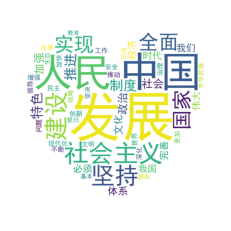

In [67]:

import matplotlib.pyplot as plt
import wordcloud
from imageio import imread
bg_pic=imread('爱心图片.jpg')
f=open("十九大报告_词频.txt",'r')
text=f.read()
f.close
wcloud=wordcloud.WordCloud(font_path=r'D:\C盘下载\Python\simhei.ttf',background_color="white",width=1000,max_words=50,min_font_size=10,mask=bg_pic,height=1000,margin=2).generate(text)
wcloud.to_file("十九大cloud_heart.png")
plt.imshow(wcloud)
plt.axis('off')
plt.show

#### **2.1.2 制作二十大词频词云**

<function matplotlib.pyplot.show(close=None, block=None)>

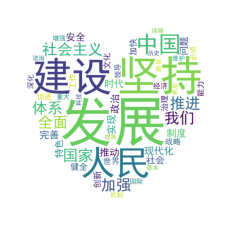

In [66]:
import matplotlib.pyplot as plt
import wordcloud
from imageio import imread
bg_pic=imread('爱心图片.jpg')
f=open("二十大报告_词频.txt",'r')
text=f.read()
f.close
wcloud=wordcloud.WordCloud(font_path=r'D:\C盘下载\Python\simhei.ttf',background_color="white",width=1000,max_words=50,min_font_size=10,mask=bg_pic,height=1000,margin=2).generate(text)
wcloud.to_file("二十大cloud_heart.png")
plt.imshow(wcloud)
plt.axis('off')
plt.show

#### **2.1.3 十九大与二十大报告的热词统计**

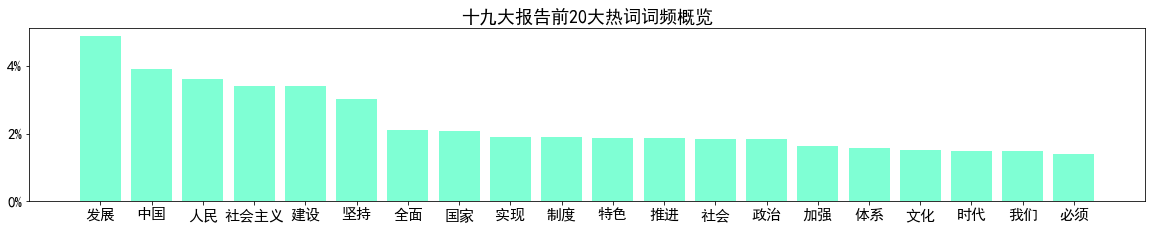

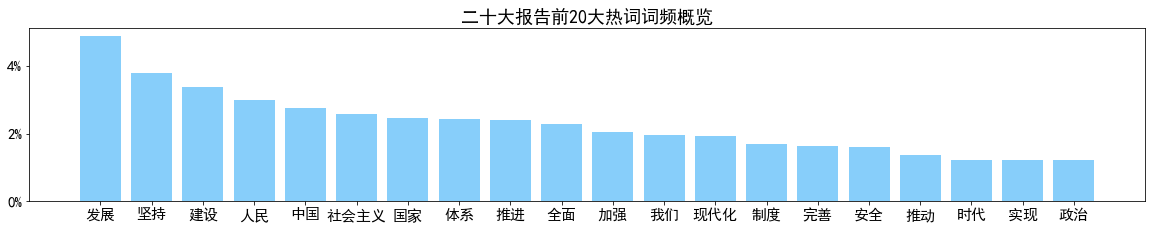

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')

df=pd.read_excel('二十大十九大报告词频1.xlsx',header=0)
df['十九大热词出现频率']=df['十九大报告热词词频'].astype('float32')/df['十九大报告热词词频'].sum()
df['二十大热词出现频率']=df['二十大报告热词词频'].astype('float32')/df['二十大报告热词词频'].sum()
matplotlib.rcParams['font.family']='SimHei'

x1=df['十九大报告热词'].iloc[0:20]
height1=df['十九大热词出现频率'].iloc[0:20]
plt.figure(figsize=(20,7)) 
plt.rcParams.update({'font.size':15})
plt.subplot(2,1,1)
plt.bar(x1,height1,color='aquamarine')
plt.title("十九大报告前20大热词词频概览")
def to_percent(temp, position):
    return '%1.00f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.figure(figsize=(20,7)) 
plt.rcParams.update({'font.size':15})
plt.subplot(2,1,2)
plt.bar(df['二十大报告热词'].iloc[0:20],df['二十大热词出现频率'].iloc[0:20],color="#87CEFA")
plt.title("二十大报告前20大热词词频概览")
 
def to_percent(temp, position):
    return '%1.00f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()

经过统计，我们发现十九大报告与二十大报告中有一些重复出现且较无意义的词语，因此，在下文的分析中，我们选择将这些词语剔除后，再作进一步分析

### **2.2 十九大报告与二十大报告共同高频词统计**

我们将十九大报告与二十大报告中共同出现且较无意义的词语进行剔除。  
剔除词语列表为：坚持、建设、中国、国家、我们、工作、治理、推进、加强、推动、加快、不断、更加、增强、提高、机制、完善、我国、政治、健全、能力、领导。

#### **2.2.1 十九大报告第一次删减后词频**

In [27]:
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')
import jieba
def wordFreq(filepath,text,topn):
    words=jieba.lcut(text.strip())
    counts={}
    stopwords=stopwordslist('mystopwords1.txt')
    for word in words:
        if len(word)==1:
            continue
        elif word not in stopwords:
            counts[word]=counts.get(word,0)+1
    items=list(counts.items())
    items.sort(key=lambda x:x[1],reverse=True)
    f1=open(filepath[:-6]+'_删减词频1.txt',"w")
    for i in range(topn):
        word,count=items[i]
        f1.write("{}\t{}\n".format(word,count))
    f1.close
def stopwordslist(filepath):
    stopwords=[line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords
filepath='十九大报告全文.txt'
text = open('十九大报告全文.txt',encoding="utf-8").read()
stopwords=stopwordslist(filepath)
wordFreq(filepath,text,50)

#### **2.2.2 二十大报告第一次删减后词频**

In [28]:
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')
import jieba
def wordFreq(filepath,text,topn):
    words=jieba.lcut(text.strip())
    counts={}
    stopwords=stopwordslist('mystopwords1.txt')
    for word in words:
        if len(word)==1:
            continue
        elif word not in stopwords:
            counts[word]=counts.get(word,0)+1
    items=list(counts.items())
    items.sort(key=lambda x:x[1],reverse=True)
    f=open(filepath[:-6]+'_删减词频1.txt',"w")
    for i in range(topn):
        word,count=items[i]
        f.write("{}\t{}\n".format(word,count))
    f.close
def stopwordslist(filepath):
    stopwords=[line.strip()for line in open(filepath,'r',encoding='utf-8').readlines()]
    return stopwords
filepath='二十大报告全文.txt'
text = open('二十大报告全文.txt',encoding="utf-8").read()
stopwords=stopwordslist(filepath)
wordFreq(filepath,text,50)

#### **2.2.3 制作十九大第一次删减后词频词云**

<function matplotlib.pyplot.show(close=None, block=None)>

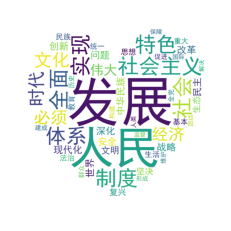

In [65]:
import matplotlib.pyplot as plt
import wordcloud
from imageio import imread
bg_pic=imread('爱心图片.jpg')
f=open("十九大报告_删减词频1.txt",'r')
text=f.read()
f.close
wcloud=wordcloud.WordCloud(font_path=r'D:\C盘下载\Python\simhei.ttf',background_color="white",width=1000,max_words=50,min_font_size=10,mask=bg_pic,height=1000,margin=2).generate(text)
wcloud.to_file("十九大删减cloud_heart1.png")
plt.imshow(wcloud)
plt.axis('off')
plt.show

#### **2.2.4 制作二十大第一次删减后词频词云**

<function matplotlib.pyplot.show(close=None, block=None)>

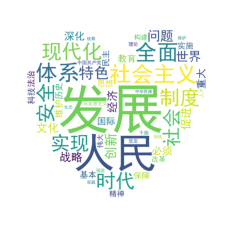

In [64]:
import matplotlib.pyplot as plt
import wordcloud
from imageio import imread
bg_pic=imread('爱心图片.jpg')
f=open("二十大报告_删减词频1.txt",'r')
text=f.read()
f.close
wcloud=wordcloud.WordCloud(font_path=r'D:\C盘下载\Python\simhei.ttf',background_color="white",width=1000,max_words=50,min_font_size=10,mask=bg_pic,height=1000,margin=2).generate(text)
wcloud.to_file("二十大删减cloud_heart1.png")
plt.imshow(wcloud)
plt.axis('off')
plt.show


#### **2.2.5 十九大二十大报告删减后的高频词分析**

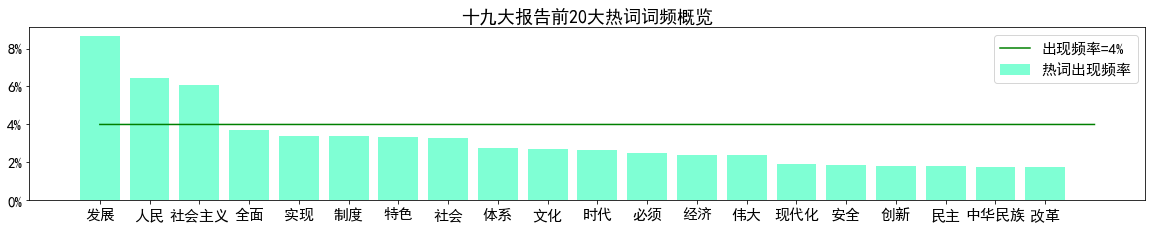

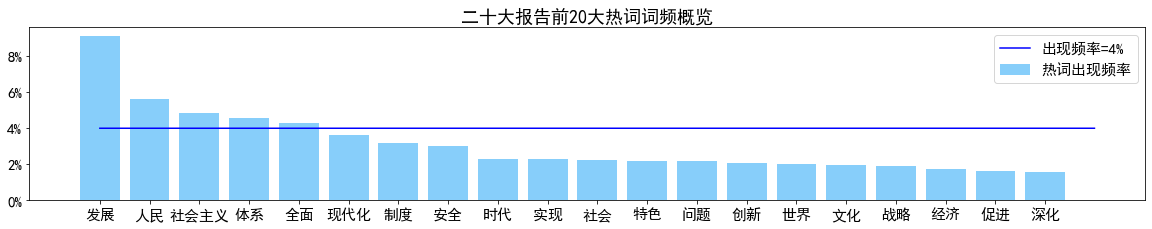

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter

df=pd.read_excel('十九大二十大删减词频1.xlsx',header=0)
df['十九大热词出现频率']=df['十九大报告词频'].astype('float32')/df['十九大报告词频'].sum()
df['二十大热词出现频率']=df['二十大报告词频'].astype('float32')/df['二十大报告词频'].sum()
matplotlib.rcParams['font.family']='SimHei'
p1 = np.arange(0,len(df.iloc[0:20]),0.01)
p2 = 0.04 + p1*0
q1=np.arange(0,len(df.iloc[0:20]),0.01)
q2=0.04+q1*0

x1=df['十九大报告热词'].iloc[0:20]
height1=df['十九大热词出现频率'].iloc[0:20]
plt.figure(figsize=(20,7)) 
plt.rcParams.update({'font.size':15})
plt.subplot(2,1,1)
plt.bar(x1,height1,color='aquamarine',label='热词出现频率')
plt.plot(p1,p2,color='g',label='出现频率=4%')
plt.legend()
plt.title("十九大报告前20大热词词频概览")
def to_percent(temp, position):
    return '%1.00f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.figure(figsize=(20,7)) 
plt.rcParams.update({'font.size':15})
plt.subplot(2,1,2)
plt.plot(q1,q2,color='b',label='出现频率=4%')
plt.bar(df['二十大报告热词'].iloc[0:20],df['二十大热词出现频率'].iloc[0:20],color="#87CEFA",label='热词出现频率')
plt.legend()
plt.title("二十大报告前20大热词词频概览")
 
def to_percent(temp, position):
    return '%1.00f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()

#### **2.2.6 十九大及二十大报告的共同热词分析**

在两份报告的前二十大热词中共同出现的热词个数：15


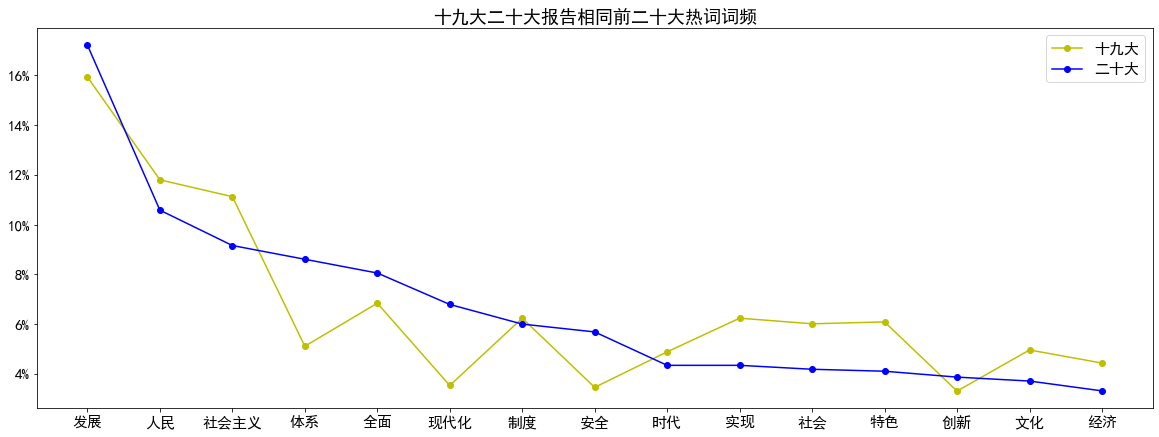

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')

df1=pd.read_excel('二十大报告删减词频1.xlsx',header=0).iloc[0:20]
df2=pd.read_excel('十九大报告删减词频1.xlsx',header=0).iloc[0:20]
result=pd.merge(df1,df2,on='热词')
result['二十大报告热词频率']=result['二十大报告热词词频']/result['二十大报告热词词频'].sum()
result['十九大报告热词频率']=result['十九大报告热词词频']/result['十九大报告热词词频'].sum()
print("在两份报告的前二十大热词中共同出现的热词个数：{}".format(result['热词'].count()))

matplotlib.rcParams['font.family']='SimHei'

x1=result['热词'].iloc[0:20]
y1=result['十九大报告热词频率']
y2=result['二十大报告热词频率']
plt.figure(figsize=(20,7)) 
plt.rcParams.update({'font.size':15})
plt.plot(x1,y1,"yo-",x1,y2,"bo-")
plt.title("十九大二十大报告相同前二十大热词词频")
plt.legend(["十九大","二十大"])
def to_percent(temp, position):
    return '%1.00f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))


### **2.3 结论**

在经过筛选后的十九大及二十大报告的前二十大的热词中，有以上15个热词在两份报告中共同出现，可以发现：  
1、发展与人民始终是党中央的使命与职责。我们党中央始终关心着民族发展与人民福祉，设身处地的为人民谋福利、求发展，是我们党中央始终如一的坚持。  
2、我们党中央始终坚持社会主义的发展与制度建设。也是我们党努力担当，永不退缩的使命。  
3、我国始终坚持全面发展，说明我国的发展方向已经不仅仅限于经济发展，更是追求全方位的发展，例如：法治、生态、公共卫生、教育等等全方位、多角度的发展。  
4、我国紧跟时代脚步，发展前进。我国始终顺应时代潮流，跟随时代的大趋势、大背景，不做与时代相违背的事。  
5、创新始终是我国进步的源泉，在我国产业结构升级的关键时期，创新更是现在的重中之重。我们也要努力顺应时代潮流，不断突破自我，勇当先锋，在时代中奉献自我。  
6、文化与经济始终是党和民族发展的出发点。我国始终强调文化自信与经济发展。  
此外，本文还注意到，虽然有些热词共同出现在两份报告的前二十大热词中，出现的次数却相差很大。下面，本文通过做差来分析两份报告中的不同，即二十大报告对十九大报告的创新。

## **三、二十大报告的创新**

### **3.1 二十大报告与十九大报告的差异**

#### **3.1.1 计算两份报告相差较大的词频**

In [32]:
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.family']='SimHei'
df=pd.read_excel('十九大二十大删减词频1.xlsx',header=0)
df['十九大报告热词1']=df['十九大报告热词']
df=df.set_index(['十九大报告热词'])
only20={}
words1=df["十九大报告热词1"]
words2=df["二十大报告热词"]
for word in words2:
    if word not in words1:
        only20[word]=0
    elif word in words1:
        only20[word]=df.at[word,"十九大报告词频"]
s19=pd.Series(only20)
df=df.set_index(['二十大报告热词'])
s20=pd.Series(df['二十大报告词频'])
diff=s20-s19
diffPosi=diff[diff>0].sort_values(ascending=False)
diffNega=diff[diff<0].sort_values(ascending=True)
diffAbs=diffNega*(-1)
diffPosi.to_excel('二十大比十九大多的词频数.xlsx',sheet_name='sheet1')
diffAbs.to_excel('二十大比十九大少的词频数.xlsx',sheet_name='sheet1')

#### **3.1.2 二十大比十九大多的热词**

<function matplotlib.pyplot.show(close=None, block=None)>

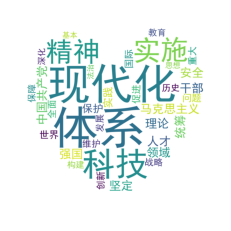

In [55]:
import matplotlib.pyplot as plt
import wordcloud
from imageio import imread
item=list(diffPosi)
f=open('二十大比十九大多的热词.txt',"w")
for i in range(diffPosi.count()):
    word,count=items[i]
    f.write("{}\t{}\n".format(word,count))
f.close
bg_pic=imread('爱心图片.jpg')
f=open("二十大比十九大多的热词.txt",'r')
text=f.read()
f.close
wcloud=wordcloud.WordCloud(font_path=r'D:\C盘下载\Python\simhei.ttf',background_color="white",mask=bg_pic,width=2000,max_words=50,min_font_size=10,height=2000,margin=2).generate(text)
wcloud.to_file("二十大比十九大多的词频数cloud_heart.png")
plt.imshow(wcloud)
plt.axis('off')
plt.show

#### **3.1.3 制作二十大比十九大少的热词**

<function matplotlib.pyplot.show(close=None, block=None)>

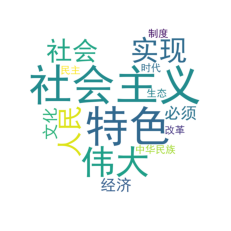

In [63]:
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.family']='SimHei'
df=pd.read_excel('十九大二十大删减词频1.xlsx',header=0)
df['十九大报告热词1']=df['十九大报告热词']
df=df.set_index(['十九大报告热词'])
only20={}
words1=df["十九大报告热词1"]
words2=df["二十大报告热词"]
for word in words2:
    if word not in words1:
        only20[word]=0
    elif word in words1:
        only20[word]=df.at[word,"十九大报告词频"]
s19=pd.Series(only20)
df=df.set_index(['二十大报告热词'])
s20=pd.Series(df['二十大报告词频'])
diff=s20-s19
diffPosi=diff[diff>0].sort_values(ascending=False)
diffNega=diff[diff<0].sort_values(ascending=True)
diffAbs=diffNega*(-1)
bg_pic=imread('爱心图片.jpg')
f=open("二十大比十九大少的热词.txt",'r')
text=f.read()
f.close
wcloud=wordcloud.WordCloud(font_path=r'D:\C盘下载\Python\simhei.ttf',background_color="white",mask=bg_pic,width=2000,max_words=50,min_font_size=10,height=2000,margin=2).generate(text)
wcloud.to_file("二十大比十九大少的词频数cloud_heart.png")
plt.imshow(wcloud)
plt.axis('off')
plt.show

#### **3.1.4 二十大报告相比于十九大报告增加或减少的热词与词频数统计**

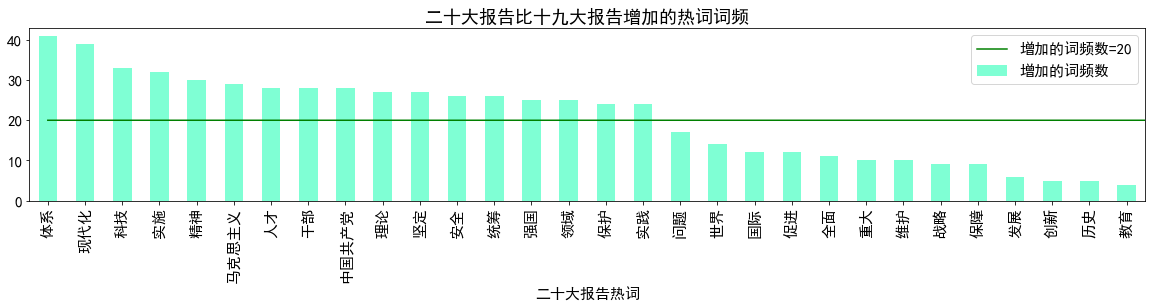

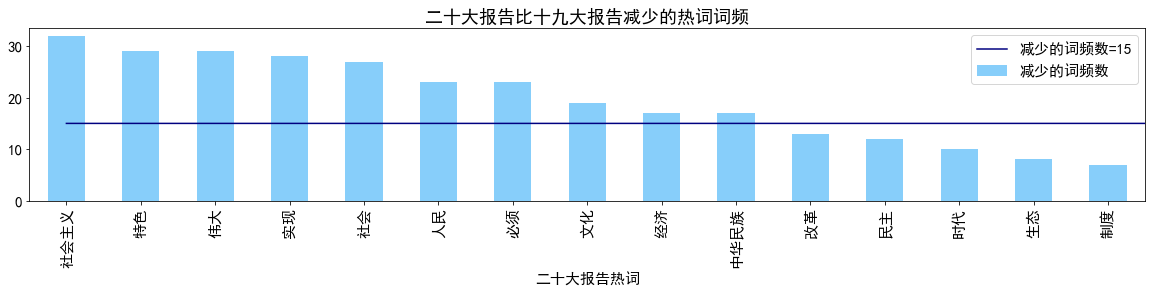

In [33]:
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import numpy as np
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.family']='SimHei'
df=pd.read_excel('十九大二十大删减词频1.xlsx',header=0)
df['十九大报告热词1']=df['十九大报告热词']
df=df.set_index(['十九大报告热词'])
only20={}
words1=df["十九大报告热词1"]
words2=df["二十大报告热词"]
for word in words2:
    if word not in words1:
        only20[word]=0
    elif word in words1:
        only20[word]=df.at[word,"十九大报告词频"]
s19=pd.Series(only20)
df=df.set_index(['二十大报告热词'])
s20=pd.Series(df['二十大报告词频'])
diff=s20-s19
diffPosi=diff[diff>0].sort_values(ascending=False)
diffNega=diff[diff<0].sort_values(ascending=True)
diffPosi30=diffPosi[0:30]
diffNega15=diffNega[0:15]
diffAbs=diffNega15*(-1)
p1 = np.arange(0,len(diffPosi30),0.01)
p2 = 20 + p1*0
q1=np.arange(0,len(diffAbs),0.01)
q2=15+q1*0
plt.figure(figsize=(20,7)) 
plt.rcParams.update({'font.size':15})
plt.subplot(2,1,1)
plt.plot(p1,p2,color='green',label='增加的词频数=20')
diffPosi30.plot(kind='bar',title='二十大报告比十九大报告增加的热词词频',color='aquamarine',label='增加的词频数')
plt.legend()
plt.figure(figsize=(20,7))
plt.rcParams.update({'font.size':15})
plt.subplot(2,1,2)
plt.plot(q1,q2,color='navy',label='减少的词频数=15')
diffAbs.plot(kind='bar',title='二十大报告比十九大报告减少的热词词频',color="#87CEFA",label='减少的词频数')
plt.legend()

### **3.2 结论**

#### **3.2.1 二十大报告更加重视的新方向**

对比以上两份报告的不同点，本文发现二十大报告相比于十九大报告的发展方向有所转变。
更为重视的发展方向：
<br>1、体系一词在二十大报告中多提及41词，说明党中央高度重视体系的建设工作，下文本文将重点关注理论体系将在哪些方面重点建设。
<br>2、现代化一词在二十大报告中多提及39次，说明我们国家社会发展阶段比十九大时期更进一步，现代化建设也被提到了更重要的位置。
<br>3、“科技”、“创新”与“发展”同样也是在更为重要的位置，在中美关系紧张的当下，说明我们国家希望能够通过自身科技实力的提高减少对美国科技的依赖，打造属于我国的新的比较优势。我们也应该不断突破自我，培养创新精神与创新能力，为我国产业调整与产业升级打下坚实的人才基础。
<br>4、在近年来扑朔迷离的国际局势下，又伴随新冠疫情的反复冲击，二十大报告也反复提及“安全”、“坚定”、“保护”等关键词，说明我国保护自己经济与国家安全的坚定决心与信心。
<br>5、在我国产业转型升级，中国制造向中国“智”造的重要关口，我国也到了急需用人之际。二十大报告中，党中央将“人才”、“干部”以及“教育”都提到了更重要的位置，表现了我国对人才培养的重视，而我们身为即将走入社会的青年，也应审时度势，将自身命运与国家命运紧密结合，在国家转型的重要关口贡献自己的力量。
<br>6、中国共产党的提及次数也显著增多，表明我国对党建工作的重视，希望从严治党，更好的为人民服务。

#### **3.2.2 二十大报告相比于十九大减少提及的方面**

1、虽然社会主义在二十大中提及的次数明显减少，但马克思主义在二十大报告中出现的频率明显上升。在国际局势风云变动之际，党中央追根溯源，选用了更为理论的“马克思主义”来表达我们党治国理政的根本思想。
<br>2、“经济”提及的次数也变少，在二十大报告中取而代之的是“全面”一词。可见我国对发展一词不仅仅局限于经济，而是更加追求发展质量，追求转型升级，追求各领域全面发展，而非单一经济维度上的发展 。
<br>3、“生态”提及的次数也大大降低，这可能是由于我国的生态文明建设已经在过去的五年中取得了一定的成就，因此党中央在二十大中减少了对生态的提及次数。

### **3.3 结论的验证**

#### **3.3.1 对“生态”一词提及次数减少的验证**

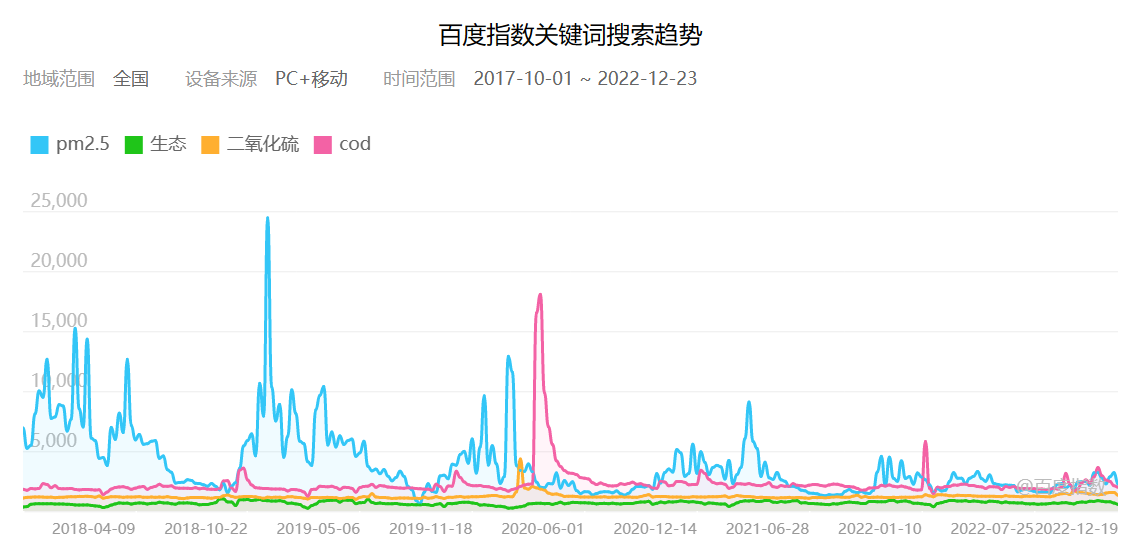

首先，本文使用百度指数关键词搜索趋势对于生态相关词语的热度进行统计，我们发现：
<br>1、虽然生态一词检索频率没有发生显著的变化，但是本文关注其他方面的环境词汇搜索情况。
<br>2、代表空气质量的pm2.5搜索指数自2018-2019年达到高峰期后，近几年一致呈现下降趋势，表明大家对环境的关注度降低。
<br>3、代表工厂废弃排放量的二氧化硫和代表水污染指标的COD在2020年关注度达到高峰后，也在近两年的有所回落。
<br>4、这与我们党中央二十大中所展现的发展方向的转变相契合。

<Figure size 1296x288 with 0 Axes>

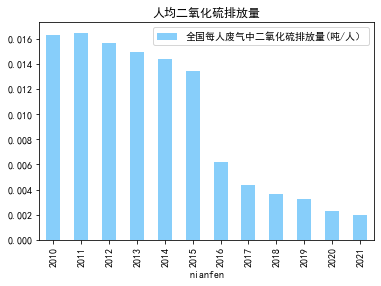

<Figure size 720x360 with 0 Axes>

In [4]:
import os
os.getcwd()
os.chdir('D:\\C盘下载\\Python')
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
import datetime
from datetime import datetime
from datetime import timedelta
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.family']='SimHei'
df=pd.read_excel('二氧化硫排放.xlsx',header=0)
df=df.set_index('nianfen')
plt.figure(figsize=(18,4))
plt.rcParams.update({'font.size':10})
df.plot(kind='bar',title='人均二氧化硫排放量',color="#87CEFA")
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size':10})


本文发现自2016年我国二氧化硫排放量显著下降以来，2016-2020年，我国二氧化硫排放量始终维持在一个较低水平，说明我国对二氧化硫排放量控制较好，也符合二十大所展现的政策转向，即我国在前五年的生态环境保护措施较为完善。

#### **3.3.2 对“安全”一词重视程度上升的验证**

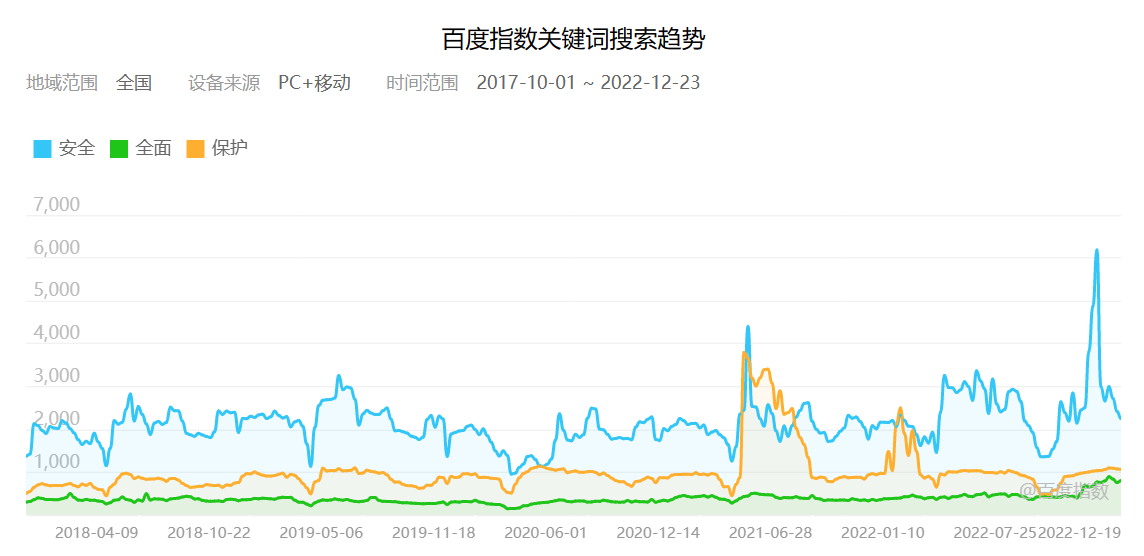

在这里本文关注安全、全面与保护的百度搜索指数，近年来搜索热度不断攀升，尤其在安全方面。根据上图，2021年以来，“安全”一词热度激增。因此我们党中央方向的转变与人民百姓所关注的方向高度统一。

## **四、二十大报告细致分析**

### **4.1 对二十大报告段落关系的分析**

<function matplotlib.pyplot.show(close=None, block=None)>

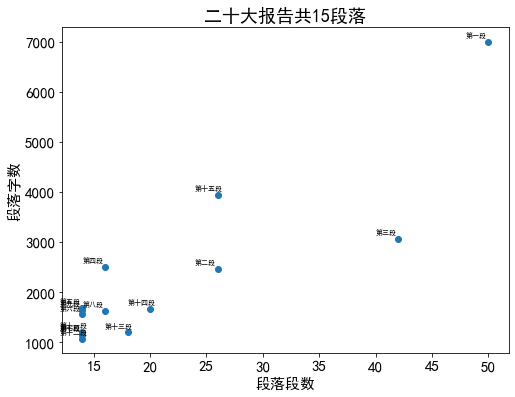

In [25]:
f=open('二十大报告全文.txt','r',encoding='utf-8')
s=f.read()
import re
chapter=re.findall("第[\u4E00-\u9FA5]+段",s)
lst_start_chapterindex=[]
for x in chapter:
    lst_start_chapterindex.append(s.index(x))
lst_end_chapterindex=lst_start_chapterindex[1:]+[len(s)]
lst_chapterindex=list(zip(lst_start_chapterindex,lst_end_chapterindex))
cnt_chap=[]
cnt_word=[]
for ii in range(15):
    start=lst_chapterindex[ii][0]
    end=lst_chapterindex[ii][1]
    cnt_chap.append(s[start:end].count("\n"))
    cnt_word.append(len(s[start:end]))
matplotlib.rcParams['font.family']='SimHei'
plt.figure(figsize=(8,6))
plt.scatter(cnt_chap,cnt_word)
for ii in range(15):
    plt.text(cnt_chap[ii]-2,cnt_word[ii]+100,chapter[ii],size=7)
plt.xlabel("段落段数")
plt.ylabel("段落字数")
plt.title("二十大报告共15段落")
plt.show

 通过上图发现：  
 1、第一段的段落数与字数都是最多的，说明我们党高度重视对过去工作的总结。   
 2、第十五段的字数排在第二位，体现了党中央对全面从严治党的决心与信心   
 3、第三段的字数与段落数同样较多，体现了我国对现代化建设的信心。党中央对现代化实现过程的规划清晰易懂，也表现除极高水准。   
 4、第二、四段字数也相对较多。第二段主要是对马克思主义的当代诠释与应用。第四段则是对高质量发展是全面建设社会主义现代化的诠释，充分展现党中央对于推动现代化建设与高质量发展的信心与决心。
 

### **4.2 二十大报告中对体系的诠释**

#### **4.2.1 “体系”一词的出现次数与段落数**

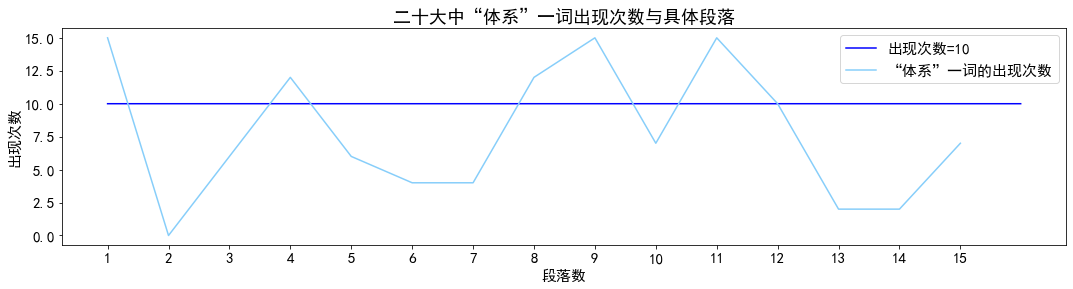

In [23]:
f=open('二十大报告全文.txt','r',encoding='utf-8')
s=f.read()
import re
chapter=re.findall("第[\u4E00-\u9FA5]+段",s)
lst_start_chapterindex=[]
for x in chapter:
    lst_start_chapterindex.append(s.index(x))
lst_end_chapterindex=lst_start_chapterindex[1:]+[len(s)]
lst_chapterindex=list(zip(lst_start_chapterindex,lst_end_chapterindex))
cnt_tixi=[]
for ii in range(15):
    start=lst_chapterindex[ii][0]
    end=lst_chapterindex[ii][1]
    cnt_tixi.append(s[start:end].count("体系"))
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(18,4))
plt.rcParams.update({'font.size':15})
q1=np.arange(0,len(cnt_tixi),0.01)
q2=10+q1*0
plt.plot(q1,q2,color="b",label='出现次数=10')
plt.plot(cnt_tixi,label="“体系”一词的出现次数",color="#87CEFA")
plt.xlabel("段落数")
plt.ylabel("出现次数")
plt.legend()
plt.title("二十大中“体系”一词出现次数与具体段落")
plt.xticks(range(0,15),range(1,16))
plt.show()

本文发现在第一段、第四段、第八段、第九段、第十一段、第十二段中“体系”一词出现频率较高   
1、第一段，体系一词用于总结十九大以来的五年的一些体系建设成就，对未来的展望没有太多参考意义。   
第四段是对中国共产党未来使命的展望，其中提到了多种体系建设，包括加强国家安全体系、产业体系、流通体系、金融市场体系、经济体系、国家法律体系及宏观经济治理体系建设等等，展现了我们党希望从理论根源出发，对于各方面的实际工作进行更好的建设。
<br>2、第八段是对文化自信的号召与强调。文化产业方面，健全现代文化产业体系和市场体系，实施重大文化产业项目带动战略。志愿服务方面，完善志愿服务制度和工作体系。思想教育方面，用社会主义核心价值观铸魂育人，完善思想政治工作体系。网络生态方面，健全网络综合治理体系，推动形成良好网络生态。
<br>3、第九段是对民生福祉的阐述。首先是对就业体系的保障与健全，切实解决群众的就业难题；其次，面临我国老龄化的现状，完善基本养老保险全国统筹制度，发展多层次、多支柱养老保险体系。健全社保基金保值增值和安全监管体系；此外，残障人员方面，完善残疾人社会保障制度和关爱服务体系，促进残疾人事业全面发展。
<br>4、第十段是对环境问题的阐述。实施全面节约战略，推进各类资源节约集约利用，加快构建废弃物循环利用体系。全面一词意为除了政府管制，也会呼吁更多的人民群众参与，实现绿色消费和绿色出行，低碳生活，实现碳中和与碳达峰。
<br>5、第十一段为对国家安全体系建设的强调。这一段重点强调了各种国家安全体系的建设，包括坚持共产党对国家的集中统一领导，完善国家战略体系、经济体系、政策体系等等。
<br>6、第十二段为对国家军事体系的强调。建强人民军队党的组织体系、打造强大战略威慑力量体系、完善中国特色军事法治体系等等。

#### **4.2.2 “体系”的相关热词关系图**

<function matplotlib.pyplot.show(close=None, block=None)>

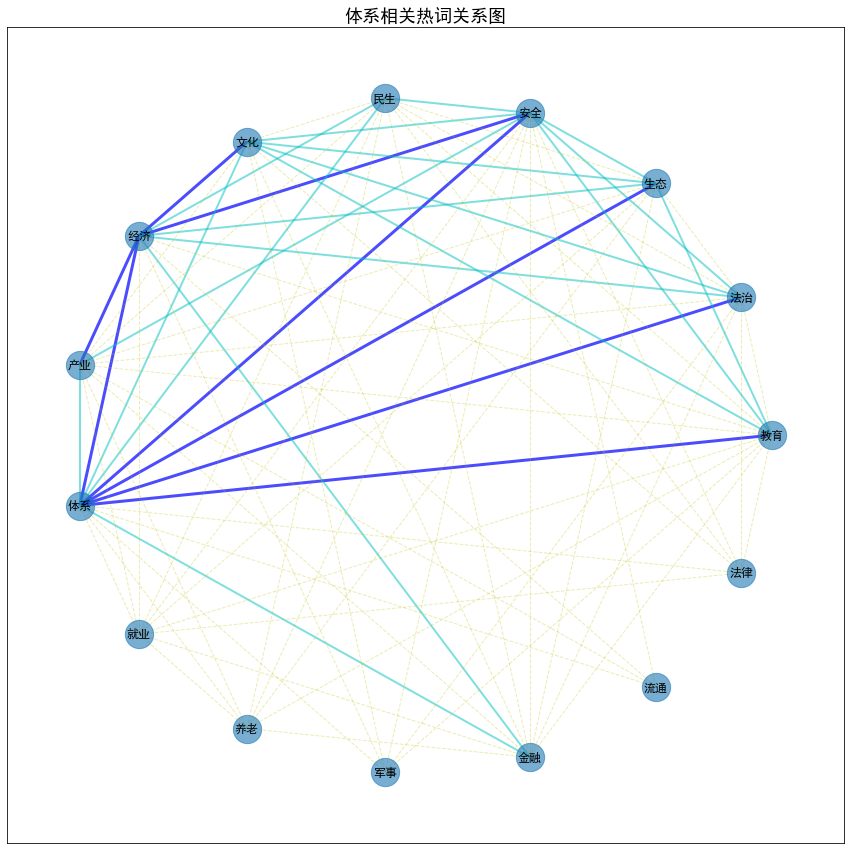

In [87]:
Names=['体系','教育','法治','生态','安全','军事','就业','民生','文化','养老','经济','产业','流通','法律','金融']
relations={}
lst_para=s.split('\n')
for text in lst_para:
    for name1 in Names:
        if name1 in text:
            for name2 in Names:
                if name2 in text and name1!=name2 and (name2,name1) not in relations:
                    relations[(name1,name2)]=relations.get((name1,name2),0)+1
maxRela=max([v for k,v in relations.items()])
relations={k:v/maxRela for k,v in relations.items()}
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(15,15))
G=nx.Graph()
for k,v in relations.items():
    G.add_edge(k[0],k[1],weight=v)
elarge=[(u,v ) for (u,v,d) in G.edges(data= True)
           if d['weight']>=0.6]
emiddle=[(u,v)for (u,v,d) in G.edges(data=True) if 0.3<d['weight']<0.6]
esmall=[(u,v)for (u,v,d)in G.edges(data=True) if d['weight']<=0.3]
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size=800)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3,alpha=0.7,edge_color='b')
nx.draw_networkx_edges(G,pos,edgelist=emiddle,width=2,alpha=0.5,edge_color='c')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.3,edge_color='y',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=12)
plt.title("体系相关热词关系图")
plt.show

本文又对体系一词进行了热词关系分析后发现，党中央对于体系的建设相对更加重视的板块为：经济、安全、生态、法治和教育，这也表现了党中央的建设重点。

### **4.3 二十大报告中对教育的阐述**

#### **4.3.1 “教育”出现次数与段落数**

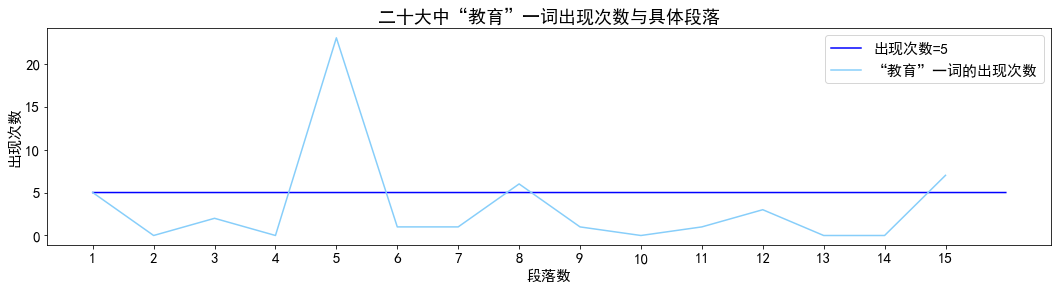

In [28]:
f=open('二十大报告全文.txt','r',encoding='utf-8')
s=f.read()
import re
chapter=re.findall("第[\u4E00-\u9FA5]+段",s)
lst_start_chapterindex=[]
for x in chapter:
    lst_start_chapterindex.append(s.index(x))
lst_end_chapterindex=lst_start_chapterindex[1:]+[len(s)]
lst_chapterindex=list(zip(lst_start_chapterindex,lst_end_chapterindex))
cnt_jiaoyu=[]
for ii in range(15):
    start=lst_chapterindex[ii][0]
    end=lst_chapterindex[ii][1]
    cnt_jiaoyu.append(s[start:end].count("教育"))
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(18,4))
plt.rcParams.update({'font.size':15})
q1=np.arange(0,len(cnt_tixi),0.01)
q2=5+q1*0
plt.plot(q1,q2,color="b",label='出现次数=5')
plt.legend()
plt.plot(cnt_jiaoyu,label="“教育”一词的出现次数",color="#87CEFA")
plt.xlabel("段落数")
plt.ylabel("出现次数")
plt.legend()
plt.title("二十大中“教育”一词出现次数与具体段落")
plt.xticks(range(0,15),range(1,16))
plt.show()

本文重点关注第五段、第八段以及第十五段对教育的阐述。
<br>1、第五段中，重点论述了教育对科教兴国以及现代化建设的重要性。我们要坚持发展教育，教育培养人才，人才驱动创新，创新带动现代化建设，要不断促进这个正向循环，让我国产业升级之路更加顺畅。
<br>2、第八段中，我们党要坚持开展思想教育工作，加强社会主义核心价值观的宣传教育，推动理想信念教育常态化制度化，深化爱国主义、集体主义、社会主义教育，着力培养担当民族复兴大任的时代新人。
<br>3、第十五段中，在党建工作中，我们党也坚持对党员的思想教育工作，提高共产党员的思想觉悟水平，加强理想信念引导。

#### **4.3.2 “教育”的相关热词关系图**

<function matplotlib.pyplot.show(close=None, block=None)>

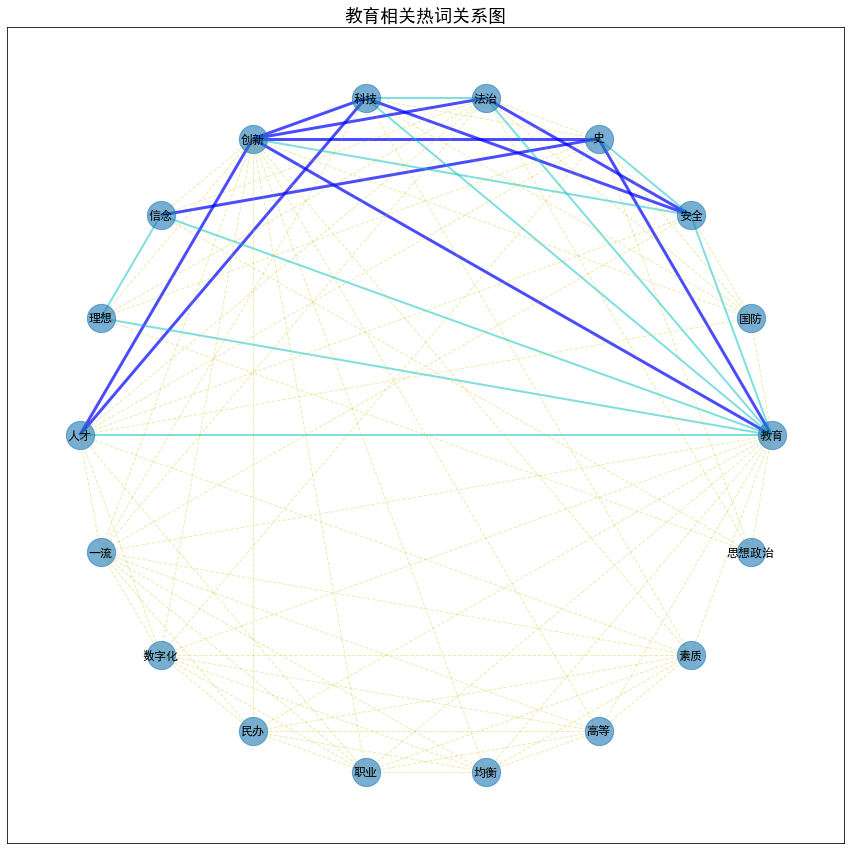

In [88]:
Names=['教育','国防','信念','思想政治','安全','史','法治','理想','数字化','民办','一流','职业','科技','创新','均衡','高等','素质','人才']
relations={}
lst_para=s.split('\n')
for text in lst_para:
    for name1 in Names:
        if name1 in text:
            for name2 in Names:
                if name2 in text and name1!=name2 and (name2,name1) not in relations:
                    relations[(name1,name2)]=relations.get((name1,name2),0)+1
maxRela=max([v for k,v in relations.items()])
relations={k:v/maxRela for k,v in relations.items()}
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(15,15))
G=nx.Graph()
for k,v in relations.items():
    G.add_edge(k[0],k[1],weight=v)
elarge=[(u,v ) for (u,v,d) in G.edges(data= True)
           if d['weight']>=0.5]
emiddle=[(u,v)for (u,v,d) in G.edges(data=True) if 0.3<d['weight']<0.5]
esmall=[(u,v)for (u,v,d)in G.edges(data=True) if d['weight']<=0.3]
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size=800)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3,alpha=0.7,edge_color='b')
nx.draw_networkx_edges(G,pos,edgelist=emiddle,width=2,alpha=0.5,edge_color='c')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.3,edge_color='y',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=12)
plt.title("教育相关热词关系图")
plt.show

本文分析“教育”与其他热词之间的联系后发现：
<br>1、“教育”与“创新”在本文中高度相关，由于教育对科教兴国以及现代化建设的重要性。我们要坚持发展教育，教育培养人才，人才驱动创新，创新带动现代化建设，要不断促进这个正向循环，让我国产业升级之路更加顺畅。
<br>2、“教育”与“史”的联系也非常紧密，可见我们党对历史的重视。不仅要求提高对党史方面的教育，也对军史，思想史等等方面的提高提出了要求。
<br>3、“教育”与“理想”、“信念”、“科技”、“法治”、“安全”的关联度也相对较高。

### **4.4 二十大报告中对“安全”的诠释**

#### **4.4.1 “安全”出现的段落数与次数**

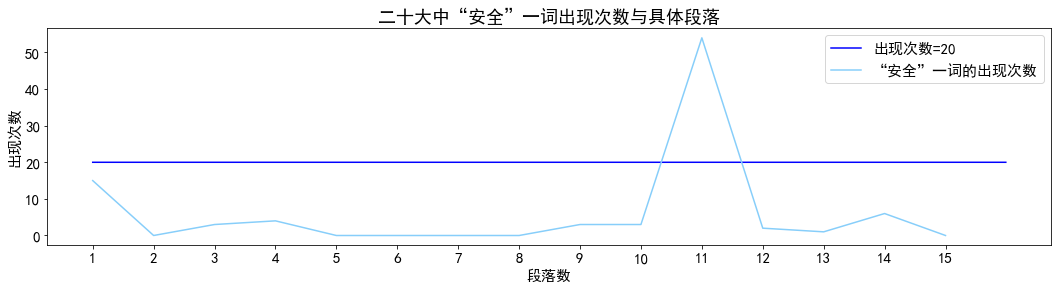

In [30]:
f=open('二十大报告全文.txt','r',encoding='utf-8')
s=f.read()
import re
chapter=re.findall("第[\u4E00-\u9FA5]+段",s)
lst_start_chapterindex=[]
for x in chapter:
    lst_start_chapterindex.append(s.index(x))
lst_end_chapterindex=lst_start_chapterindex[1:]+[len(s)]
lst_chapterindex=list(zip(lst_start_chapterindex,lst_end_chapterindex))
cnt_anquan=[]
for ii in range(15):
    start=lst_chapterindex[ii][0]
    end=lst_chapterindex[ii][1]
    cnt_anquan.append(s[start:end].count("安全"))
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(18,4))
plt.rcParams.update({'font.size':15})
q1=np.arange(0,len(cnt_tixi),0.01)
q2=20+q1*0
plt.plot(q1,q2,color="b",label='出现次数=20')
plt.plot(cnt_anquan,label="“安全”一词的出现次数",color="#87CEFA")
plt.xlabel("段落数")
plt.ylabel("出现次数")
plt.legend()
plt.title("二十大中“安全”一词出现次数与具体段落")
plt.xticks(range(0,15),range(1,16))
plt.show()


本文重点关注第十一段中对安全的阐述:
<br>1、健全国家安全体系。不仅要坚持党中央和国家对安全工作的集中统一领导，还要完善高效权威的国家安全领导体制。强化国家安全工作协调机制，完善国家安全法治体系、战略体系、政策体系、风险监测预警体系、国家应急管理体系，完善重点领域安全保障体系和重要专项协调指挥体系，强化经济、重大基础设施、金融、网络、数据、生物、资源、核、太空、海洋等安全保障体系建设。健全反制裁、反干涉、反“长臂管辖”机制。完善国家安全力量布局，构建全域联动、立体高效的国家安全防护体系。
<br>2、增强维护国家安全能力。坚定维护国家政权安全、制度安全、意识形态安全，加强重点领域安全能力建设，确保粮食、能源资源、重要产业链供应链安全，加强海外安全保障能力建设，维护我国公民、法人在海外合法权益，维护海洋权益，坚定捍卫国家主权、安全、发展利益。提高防范化解重大风险能力，严密防范系统性安全风险，严厉打击敌对势力渗透、破坏、颠覆、分裂活动。筑牢国家安全人民防线。
<br>3、提高公共安全治理水平。坚持安全第一、预防为主，建立大安全大应急框架，完善公共安全体系，推动公共安全治理模式向事前预防转型。推进安全生产风险专项整治，加强重点行业、重点领域安全监管。提高防灾减灾救灾和重大突发公共事件处置保障能力，加强国家区域应急力量建设。强化食品药品安全监管。
<br>4、完善社会治理体系。提高基层干部解决问题的能力，尽量“大事化小，小事化了”，健全共建共治共享的社会治理制度，提升社会治理效能。在社会基层坚持和发展新时代“枫桥经验”，完善正确处理新形势下人民内部矛盾机制，加强和改进人民信访工作，畅通和规范群众诉求表达、利益协调、权益保障通道，完善网格化管理、精细化服务、信息化支撑的基层治理平台。

#### **4.4.2 “安全”的相关热词关系图**

<function matplotlib.pyplot.show(close=None, block=None)>

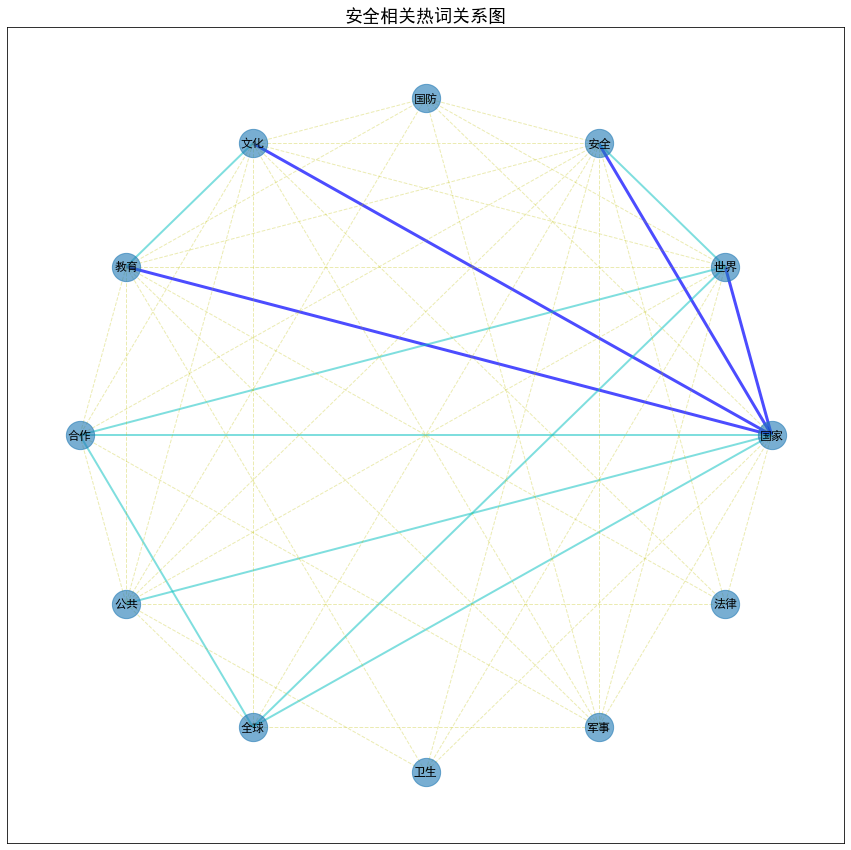

In [92]:
Names=['安全','国家','国防','文化','世界','合作','法律','军事','公共','卫生','教育','全球']
relations={}
lst_para=s.split('\n')
for text in lst_para:
    for name1 in Names:
        if name1 in text:
            for name2 in Names:
                if name2 in text and name1!=name2 and (name2,name1) not in relations:
                    relations[(name1,name2)]=relations.get((name1,name2),0)+1
maxRela=max([v for k,v in relations.items()])
relations={k:v/maxRela for k,v in relations.items()}
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(15,15))
G=nx.Graph()
for k,v in relations.items():
    G.add_edge(k[0],k[1],weight=v)
elarge=[(u,v ) for (u,v,d) in G.edges(data= True)
           if d['weight']>=0.5]
emiddle=[(u,v)for (u,v,d) in G.edges(data=True) if 0.3<d['weight']<0.5]
esmall=[(u,v)for (u,v,d)in G.edges(data=True) if d['weight']<=0.3]
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,alpha=0.9,node_size=800)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3,alpha=0.7,edge_color='b')
nx.draw_networkx_edges(G,pos,edgelist=emiddle,width=2,alpha=0.5,edge_color='c')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.3,edge_color='y',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=12)
plt.title("安全相关热词关系图")
plt.show

本文通过对安全的热词关系分析后，得出以下结论：
<br>1、“安全”与“国家”的关系最为紧密，在国际局势风云变动的背景下，我国对于国家安全高度重视。从医疗、公共卫生、军事、政权、制度、社会治理等诸多方面提高对国家安全的重视与治理能力。
<br>2、“安全”与“世界”的关系也较为密切。我国积极参与全球治理体系改革和建设，践行共商共建共享的全球治理观，坚持真正的多边主义，推进国际关系民主化，推动全球治理朝着更加公正合理的方向发展。

### **4.5 对二十大报告整体的热词关系图的分析**

<function matplotlib.pyplot.show(close=None, block=None)>

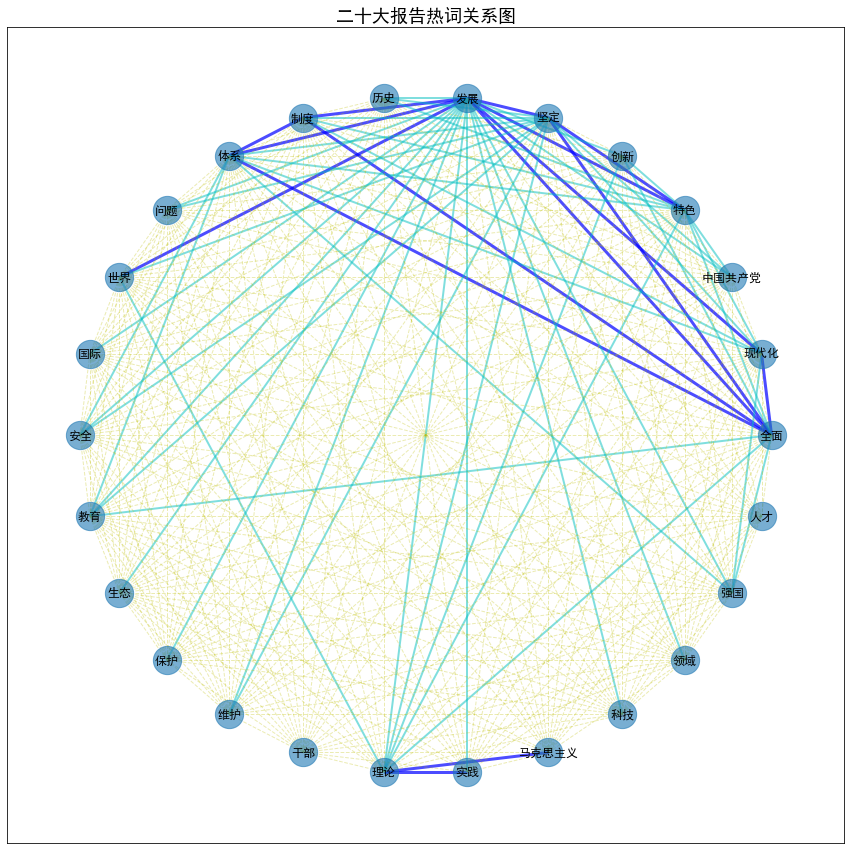

In [62]:
Names=['理论','坚定','制度','特色','安全','教育','中国共产党','马克思主义','体系','生态','保护','人才','全面','科技','创新','现代化','维护','实践','理论','发展','问题','强国','世界','国际','历史','坚定','干部','领域']
relations={}
lst_para=s.split('\n')
for text in lst_para:
    for name1 in Names:
        if name1 in text:
            for name2 in Names:
                if name2 in text and name1!=name2 and (name2,name1) not in relations:
                    relations[(name1,name2)]=relations.get((name1,name2),0)+1
maxRela=max([v for k,v in relations.items()])
relations={k:v/maxRela for k,v in relations.items()}
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(15,15))
G=nx.Graph()
for k,v in relations.items():
    G.add_edge(k[0],k[1],weight=v)
elarge=[(u,v ) for (u,v,d) in G.edges(data= True)
           if d['weight']>=0.6]
emiddle=[(u,v)for (u,v,d) in G.edges(data=True) if 0.3<d['weight']<0.6]
esmall=[(u,v)for (u,v,d)in G.edges(data=True) if d['weight']<=0.3]
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size=800)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3,alpha=0.7,edge_color='b')
nx.draw_networkx_edges(G,pos,edgelist=emiddle,width=2,alpha=0.5,edge_color='c')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.3,edge_color='y',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=12)
plt.title("二十大报告热词关系图")
plt.show

经观察得出，“全面”与“发展”是二十大报告的两大核心词汇，我们党始终坚定不移的以全面发展为中心，来进行社会主义建设。
<br>1、发展方面，我们党强调了六个方面，分别为：“制度”、“世界”、“全面”、“坚定”、“现代化”、“特色”。展现了我国发展的六大重要特征。第一，我们的发展要在建立健全社会主义制度的基础上进行。第二，我们的发展要紧跟世界大潮流与大方向。第三，全面发展是我们现阶段的重要奋斗目标。我们的发展不仅限于经济、政治层面，还有生态、文化、安全等等其他层面，我们党都高度重视。第四，我们党坚定的走以发展为中心的社会主义建设。对于发展的决心与信心都毫不动摇。第五，我们党坚定走以中国特色社会主义为核心的发展道路，坚持我们的发展道路不动摇。第六，我们已经进入现代化建设与发展的阶段，坚持现代化建设，早日实现中国社会主义现代化的伟大征程也是我们党始终的奋斗目标。
<br>2、全面方面，除全面发展外，我们党重点强调了四个方面，分别为：“体系”、“制度”、“坚定”、“现代化”。第一，建立健全社会主义制度对于我们国家各方面的全面发展都有深远的意义。第二，除去理论实践外，各方面的体系的全面建设也是我国下一阶段的重点发展目标。例如，我国对中国特色法治体系、现代文化产业体系和市场体系，志愿服务制度和工作体系、思想政治工作体系、健全网络综合治理体系、对就业体系的保障与健全以及国家安全体系的建设。第三，我们党也坚定的进行全面的发展与建设。第四，我国现代化建设同样要以全面为前提。不仅限于经济方面，更要在文化、法制、安全等方面实现现代化的伟大目标。
<br>3、此外，理论与实践方面，我们党中央高度重视马克思主义与理论、实践的结合，即马克思主义在我们党在国家治理过程中的理论与实践中的应用，始终坚定不移的在理论与实践层面都对马克思主义加以应用。

## **五、未来工作的进一步展望**

综合上述分析，我们认为党中央未来将会通过以马克思主义为基础理论为核心，通过各方面体系的健全，以此加强现代化的全面建设。“全面”包括对“教育”、“科技”、“安全”及“生态”多角度的现代化建设。同时，我国延续十九大报告的重点，即“紧跟时代发展”和“为人民服务”依然是我们党工作的重要方向。